#### Objective : Univariate Time Series Modelling using DARTS for model training and weight & Biases for model logging to beat the becnhmark model already provided

#### Created By : Ashwini Kumar

#### Start Date : 22th March 2022

#### Steps Involved :

    1. Read the data from the csv file and split into train and validation splits 
    
    2. Try out all the models in DARTs for "req_ThunB2B_Sorter" series
    
    3. Find out the model which gives the best performance

In [1]:
# Import the required packages 
from darts import TimeSeries
import pandas as pd
import tqdm as notebook_tqdm
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import wandb ## Function for weights and biases
import plotly
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel,NBEATSModel,TransformerModel,AutoARIMA,TFTModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.models import TCNModel, RNNModel
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Prophet, Theta
import os

In [2]:
# Function to read the csv file from given location & parse datetime properly
def load_dataframe(filename):
    df = pd.read_csv(filename)
    df["Date"] = pd.to_datetime(df["Date"])
    return df

# Function create the Time Series from Dataframe using a Time Series to df function
def df_to_timeseries(df,time_column, timeseries):
    series = TimeSeries.from_dataframe(df, time_column,timeseries)
    return (series)

# Define the Mean Absolute Error for evaluating our model
from darts.metrics import mae
def eval_error(actual_values,pred_values):
    return mae(actual_values,pred_values)

# Call the function to read the data properly

df = load_dataframe("_Final_master_df_2022_2017_v9_with_Bolzano.csv")
df.head(5)




,Date,RequestedQTY,GoodsIssuedQTY,InvoicedQTY,PDO number,req_Illy,req_Teddy,req_Thun,req_other,inv_Illy,...,BOL_B2B AA Thun,BOL_B2B P&P Thun,BOL_B2B Sorter Thun,BOL_B2B Sorter SM Thun,BOL_B2B Sorter BVB Thun,BOL_B2B Sorter riassortimenti WHS,BOL_B2C Thun,BOL_B2C Sorter Thun,BOL_B2C P2L Thun,BOL_Inbound Thun
0,2016-12-26,1616.0,1613.0,1613.0,135,635.0,0.0,981.0,0.0,635.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,227928.0,217034.0,216049.0,12075,12851.0,0.0,215041.0,36.0,11866.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-09,176524.0,167839.0,166669.0,10663,14442.0,0.0,162078.0,4.0,13272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-16,289548.0,280089.0,279048.0,12330,14555.0,0.0,274961.0,32.0,13514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-23,248337.0,234044.0,232787.0,15942,15244.0,0.0,233063.0,30.0,13987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Running for  req_ThunB2C
Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 5456.32642523516


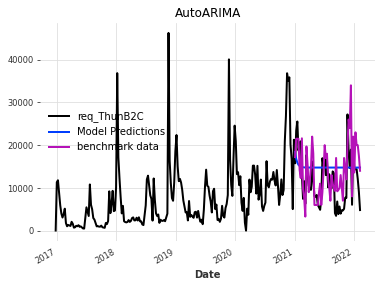

Running for : Prophet
Fitting the Model with Deafults Params : Prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 6929.268593195271


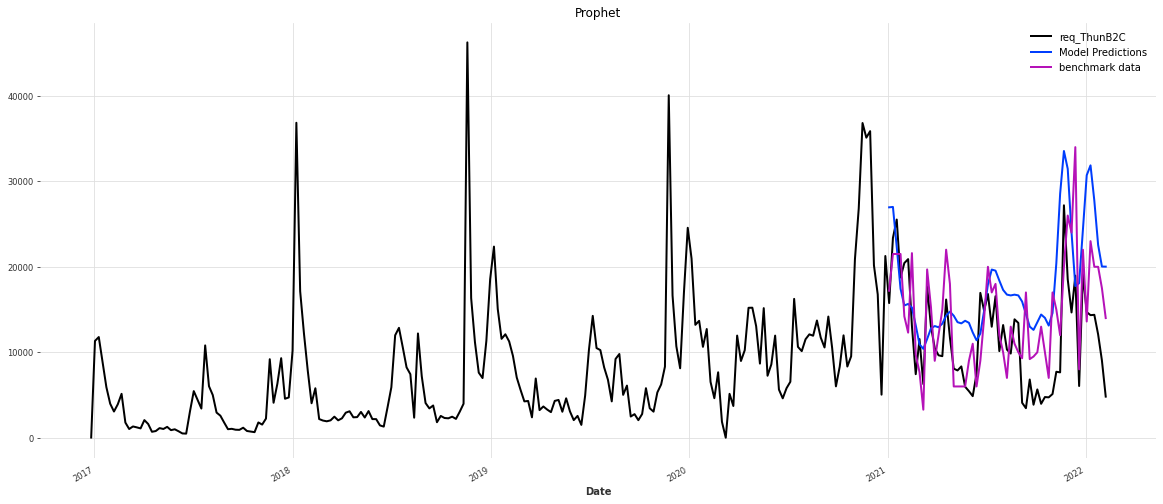

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 9250.978211923099


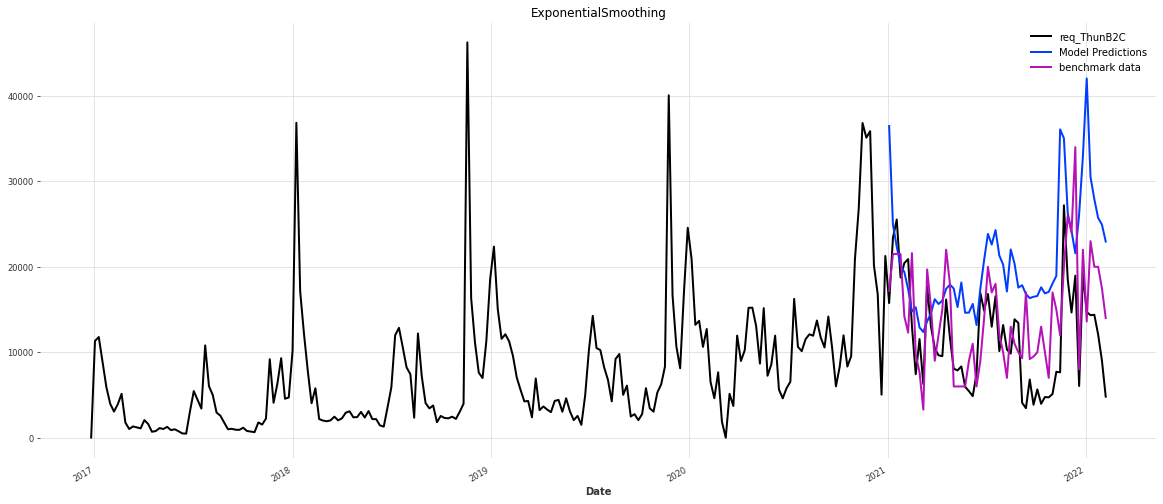

Running for : FFT
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 6891.669001168899


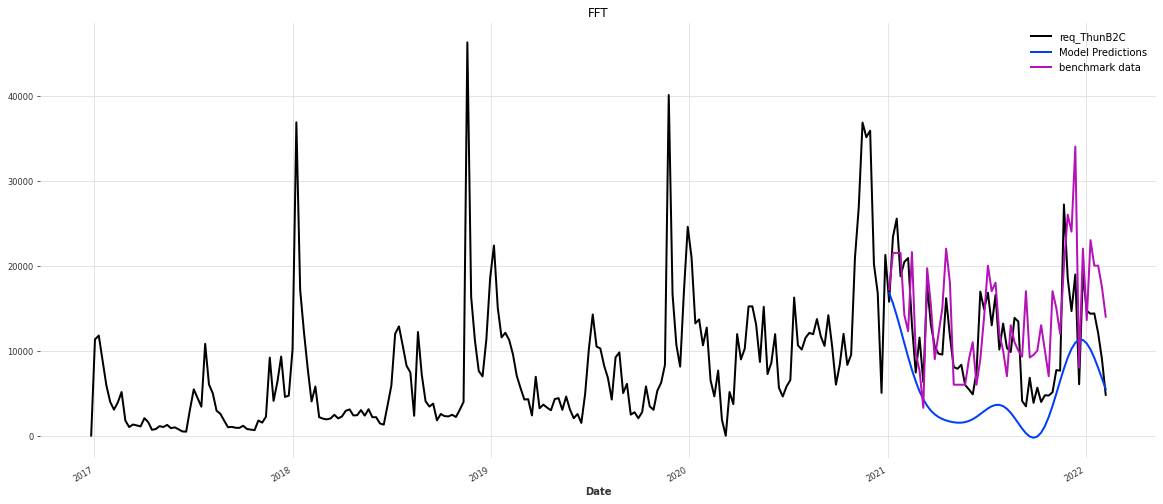

[2022-03-23 12:43:37,841] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 186 samples.
[2022-03-23 12:43:37,841] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 186 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 186 samples.
[2022-03-23 12:43:37,884] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-23 12:43:37,884] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : RNNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x0000023110A41CC8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 11707.182743302952


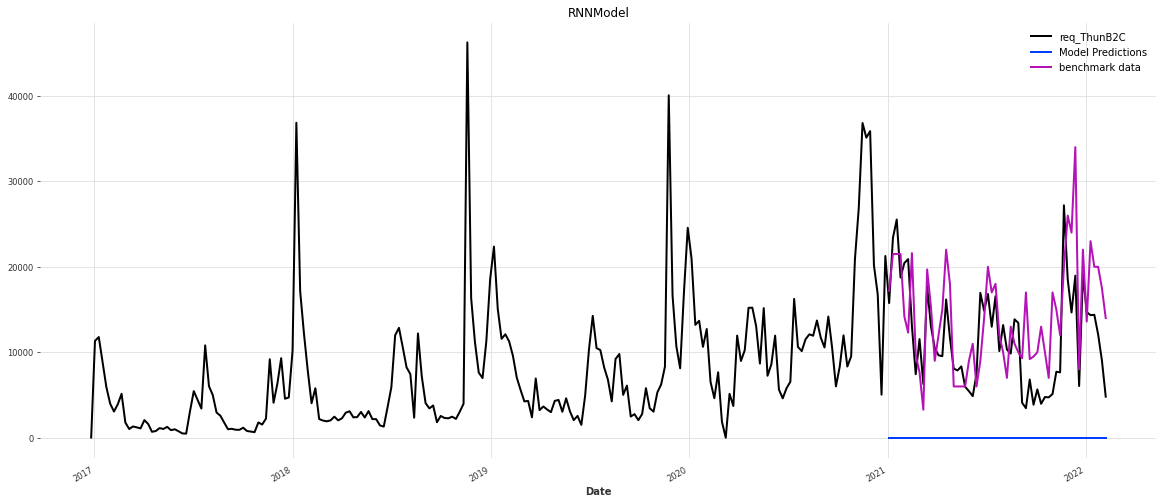

[2022-03-23 12:44:14,341] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 171 samples.
[2022-03-23 12:44:14,341] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 171 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 171 samples.
[2022-03-23 12:44:14,351] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
[2022-03-23 12:44:14,351] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 4
INFO:darts.models.forecasting.tcn_model:Number of layers chosen: 4
[2022-03-23 12:44:14,361] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-23 12:44:14,361] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available

Running for : TCNModel
Fitting the Model with Deafults Params : <darts.models.forecasting.tcn_model.TCNModel object at 0x0000023110A443C8>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 9017.797675002646


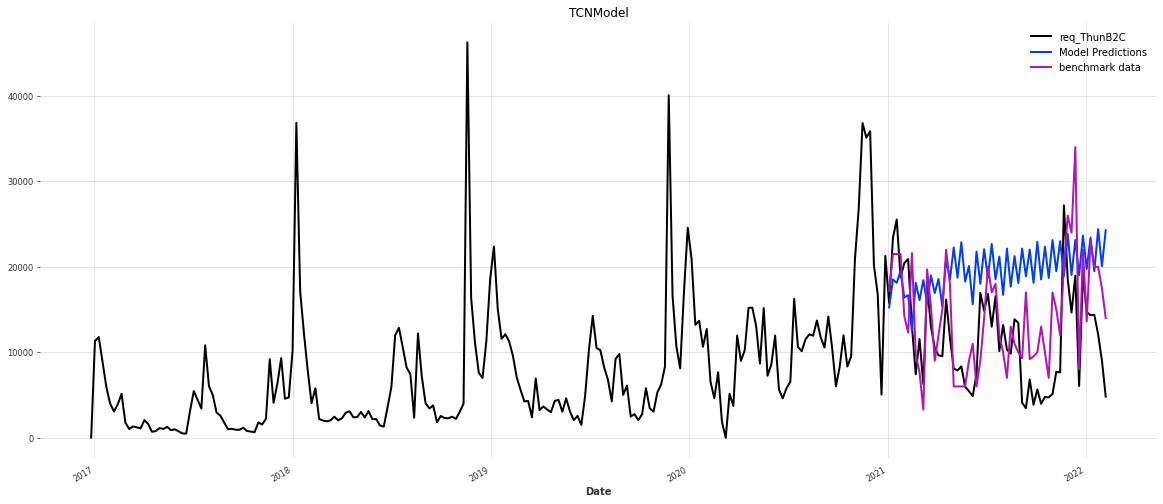

[2022-03-23 12:44:51,958] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 171 samples.
[2022-03-23 12:44:51,958] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 171 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 171 samples.
[2022-03-23 12:44:52,167] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


Running for : NBEATSModel
Fitting the Model with Deafults Params : <darts.models.forecasting.nbeats.NBEATSModel object at 0x0000023110A44208>


[2022-03-23 12:44:52,167] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.3 M 
-----------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
50.072    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 22462.798576573758


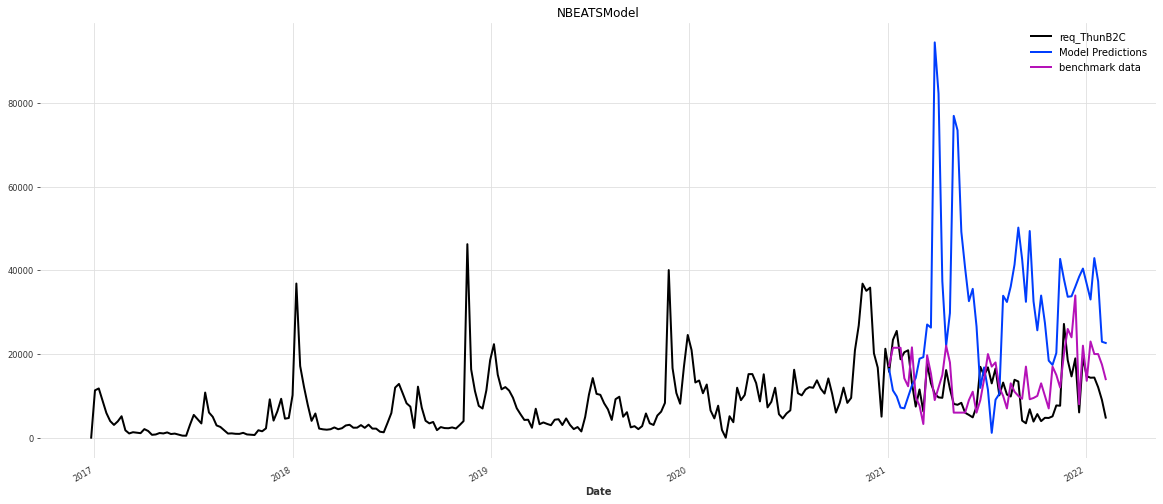

[2022-03-23 12:51:35,251] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 171 samples.
[2022-03-23 12:51:35,251] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 171 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 171 samples.
[2022-03-23 12:51:35,298] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-23 12:51:35,298] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             

Running for : TransformerModel
Fitting the Model with Deafults Params : <darts.models.forecasting.transformer_model.TransformerModel object at 0x0000023101124448>


Training: 0it [00:00, ?it/s]

Predicting: 6it [00:00, ?it/s]

Benchmark Loss is : 4774.6551724137935
Model Predict Loss is : 11537.50836763683


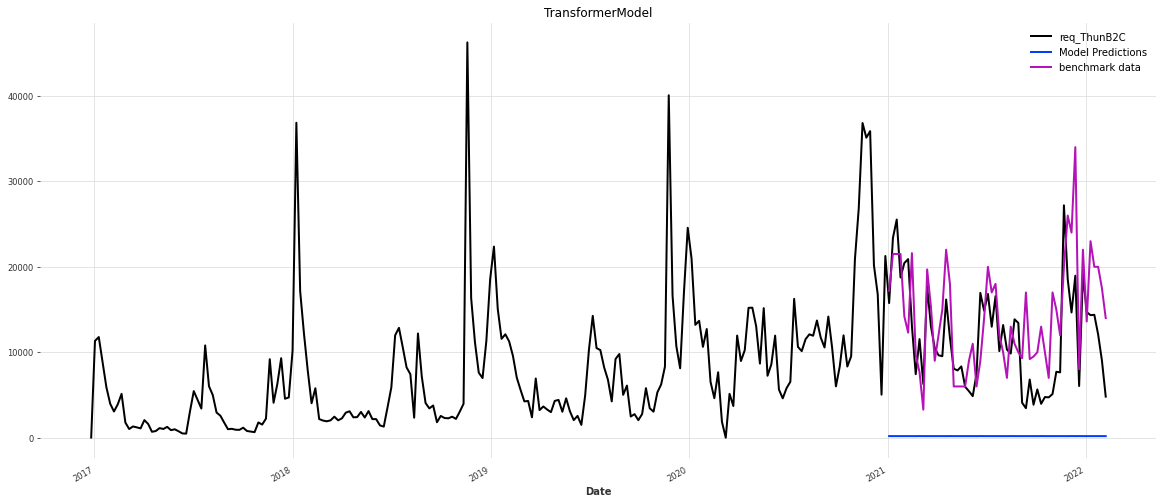

In [3]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs(series_name)
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here
#           for num, model_type in enumerate([AutoARIMA(), Prophet()]):

#           for num,model_type in enumerate([ Prophet()]):

          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TCNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                              TransformerModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
            list_model_names = ["AutoARIMA", "Prophet", "ExponentialSmoothing",  "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel"]
            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_benchmark = mae(val_data, benchmark_data)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("Benchmark Loss is :", loss_benchmark) 
            # Print the loss function for benchmark data
            print ("Model Predict Loss is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_benchmark'] = loss_benchmark
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_model'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv(series_name+"/valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
            benchmark_data.plot(label='benchmark data', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig(series_name + "/" + str(list_model_names[num]) + '.png')
            plt.show()

         


# The function to define the train_data input data and other functions
def call_timeseries(train_column,benchmark_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)

    benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    train_data, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,benchmark_data,timeseries_input


# train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP" ]
# benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun"]

train_series = ["req_ThunB2C" ]
benchmark_series = ["BOL_B2C Thun"]


for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,benchmark_data,timeseries_input = call_timeseries(train_series[i],benchmark_series[i])
    print ("Call the training function")
    train(train_series[i])

In [4]:
## Run on Filtered Data

C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Running for  req_ThunB2C


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Call the training function
Running for : AutoARIMA
Fitting the Model with Deafults Params : Auto-ARIMA
Benchmark Loss is : 0.0
Model Predict Loss is : 5456.32642523516


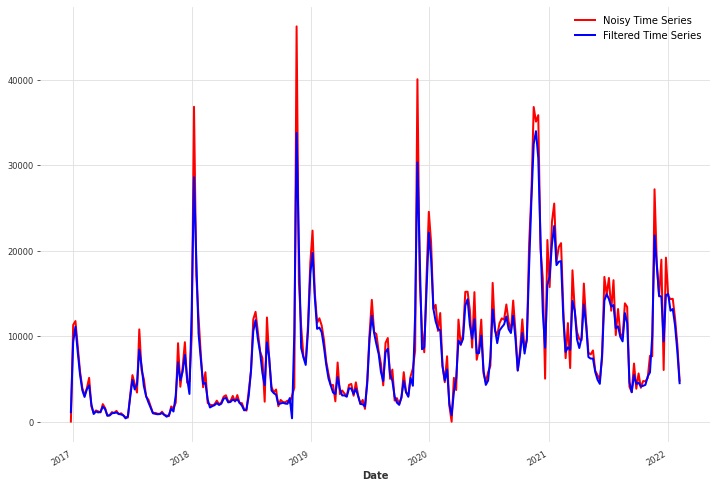

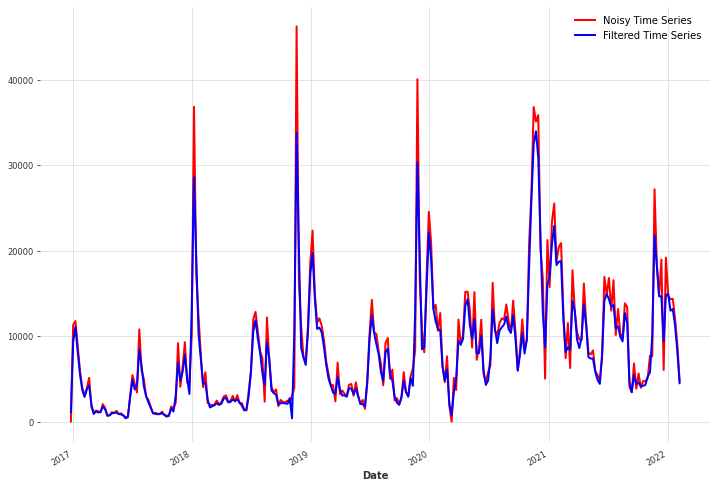

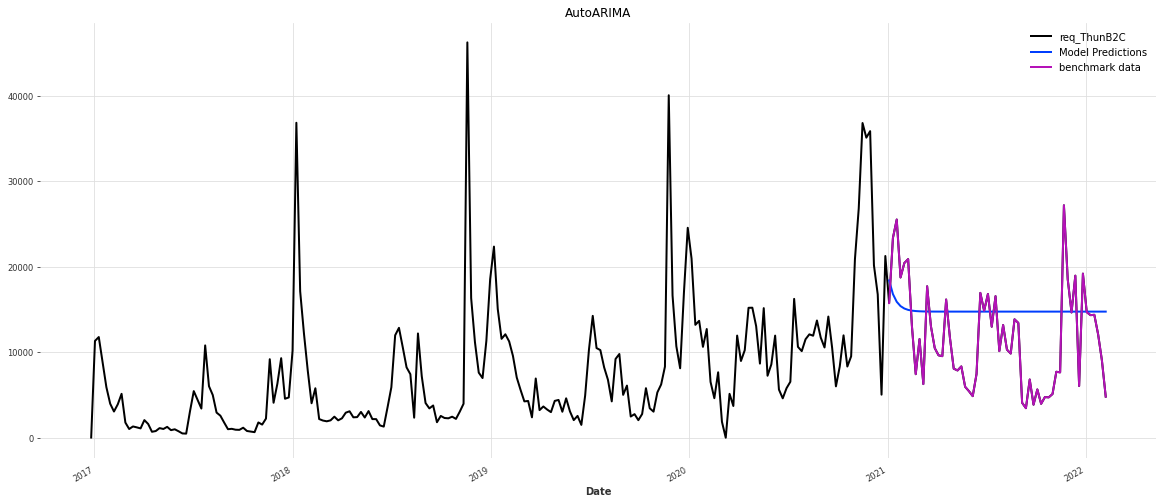

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Running for : Prophet
Fitting the Model with Deafults Params : Prophet
Benchmark Loss is : 0.0
Model Predict Loss is : 6929.268593195271


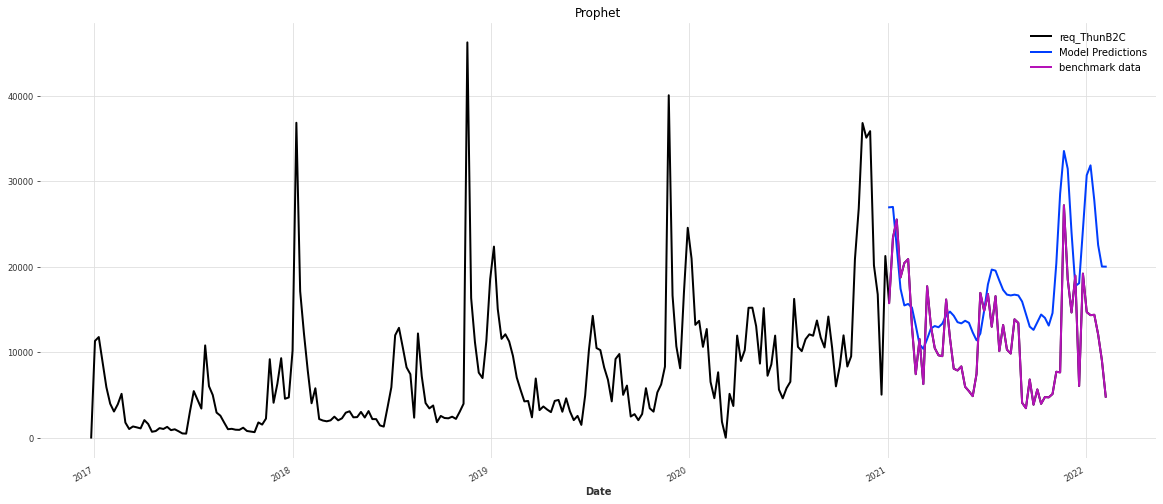

Running for : ExponentialSmoothing
Fitting the Model with Deafults Params : ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None


C:\Users\ashwini.kumar\source\repos\anaconda3\envs\practice\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Benchmark Loss is : 0.0
Model Predict Loss is : 9250.978211923099


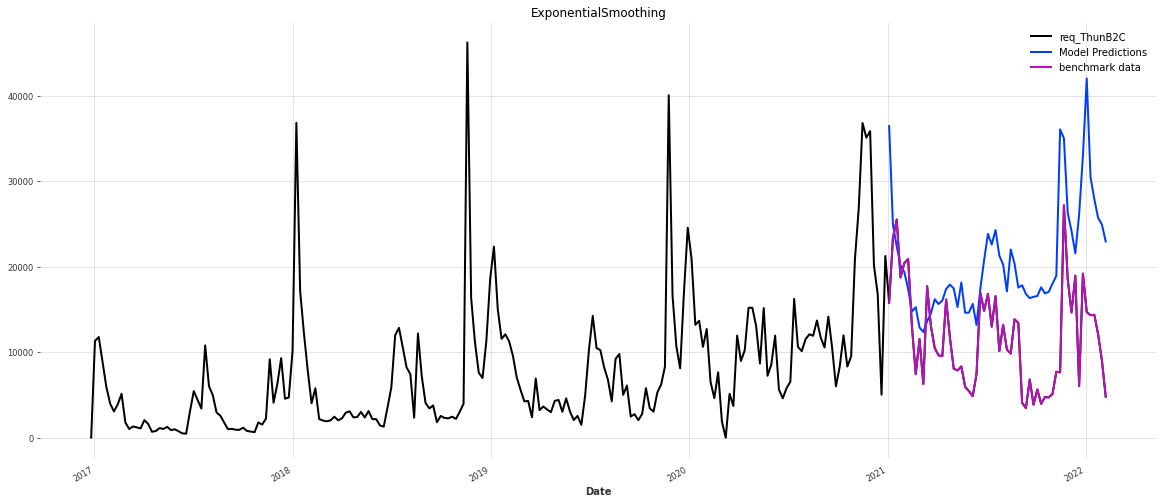

Running for : Theta
Fitting the Model with Deafults Params : FFT(nr_freqs_to_keep=10, trend=None)
Benchmark Loss is : 0.0
Model Predict Loss is : 6891.669001168899


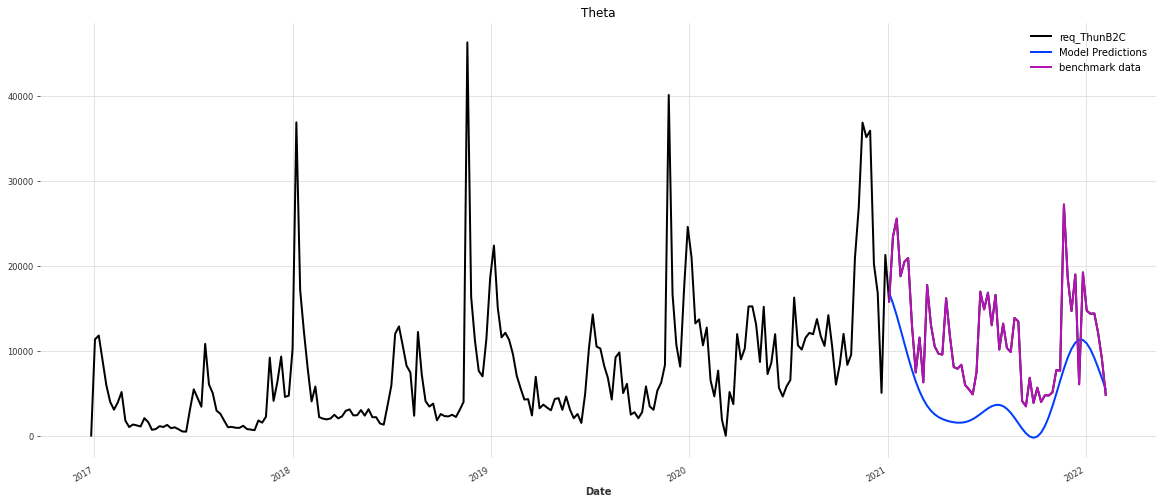

[2022-03-23 12:57:48,706] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 186 samples.
[2022-03-23 12:57:48,706] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 186 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 186 samples.
[2022-03-23 12:57:48,718] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-23 12:57:48,718] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | rnn       | RNN     | 700   
2 | V         | Linear  

Running for : FFT
Fitting the Model with Deafults Params : <darts.models.forecasting.rnn_model.RNNModel object at 0x0000023110A417C8>


Training: 0it [00:00, ?it/s]

In [ ]:
# Initialize the product details
import matplotlib.pyplot as plt
# Define the train function with Wandb Logging properly
def train(series_name):
    
    ## Create the directory  for our files
          try:
            os.makedirs(series_name + 'filtered')
          except OSError:
            pass
    
        # Define an empty Dataframe
          df = pd.DataFrame()
 # your model training code here
#           for num, model_type in enumerate([AutoARIMA(), Prophet()]):

#           for num,model_type in enumerate([ Prophet()]):

          for num,model_type in enumerate([AutoARIMA(), Prophet(), ExponentialSmoothing(),  FFT(),
                              RNNModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0),
                           
                              NBEATSModel(input_chunk_length=32, output_chunk_length=8,n_epochs = 120, random_state = 0)
                           ]):
        
            list_model_names = ["AutoARIMA", "Prophet", "ExponentialSmoothing", "Theta", "FFT",
                              "RNNModel",
                              "TCNModel",
                              "NBEATSModel",
                              "TransformerModel",
                              "TFTModel"]
            
            print ("Running for :",list_model_names[num])
#             print (str(model_type))
            model = model_type
            print ("Fitting the Model with Deafults Params :",model_type)
            # Fit the model on training data 
            model_req = model.fit(train_data)
            #Make the prediction for 58 observation on train Data
            pred_air = model_req.predict(n = 58)
            
#             print (pred_air)
            # Predict the data for Backtesting
#             if num <= 4:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=4)
#             else:
#                 pred_backtest = model.historical_forecasts(timeseries_input,
#                   start=pd.Timestamp("2020-12-28"),  forecast_horizon=8, retrain=False)
#             print (pred_backtest)
#             print (len(pred_backtest))
            # Calculate the loss off model
            loss_model = mae(val_data , pred_air)
            #Calculate the loss of bencmark model
            loss_benchmark = mae(val_data, benchmark_data)
            # Calculate the loss off backtesting
#             loss_backtesting = mae(val_data,pred_backtest)
            # Print the loss function for benchmark data
            print ("Benchmark Loss is :", loss_benchmark) 
            # Print the loss function for benchmark data
            print ("Model Predict Loss is :", loss_model)      
            # Print the loss function for benchmark data
#             print ("Model Backtest Loss is :", loss_backtesting)  
            ## Add values to Dataframe
            df.loc[num, 'model'] = model_type
            df.loc[num,'loss_benchmark'] = loss_benchmark
#             df.loc[num,'loss_backtesting'] = loss_backtesting
            df.loc[num,'loss_model'] = loss_model
            # Initialize the plotting variables
            
            df.to_csv(series_name + 'filtered' + "/valid_data.csv")
            plt.figure() 
            # Set the image size
            plt.rcParams["figure.figsize"] = (20,8)
            # Plot the actual time series data
            timeseries_input.plot()
            # Plot the prediction made
            pred_air.plot(label='Model Predictions', low_quantile=0.05, high_quantile=0.95)
            benchmark_data.plot(label='benchmark data', low_quantile=0.05, high_quantile=0.95)
#             pred_backtest.plot(label='Backtesting Predictions', low_quantile=0.05, high_quantile=0.95)
            plt.legend()
            plt.title(list_model_names[num])
            
            plt.savefig(series_name + 'filtered' + "/" + str(list_model_names[num]) + '.png')
            plt.show()

# Remove Noise using the Gaussian Wave

from sklearn.gaussian_process.kernels import ExpSineSquared, RBF
from darts.models import GaussianProcessFilter
kernel = ExpSineSquared()
# kernel = RBF()

gpf = GaussianProcessFilter(
    kernel=kernel, alpha=0.4 / 2, n_restarts_optimizer=100
)
filtered_x = gpf.filter(timeseries_input)

plt.figure(figsize=[12, 8])
timeseries_input.plot(color="red", label="Noisy Time Series")
filtered_x.plot(color="blue", label="Filtered Time Series")
plt.legend()


# The function to define the train_data input data and other functions
def call_timeseries(train_column,benchmark_column):
    timeseries_input = df_to_timeseries(df,"Date",train_column)

    benchmark_input = df_to_timeseries(df,"Date",benchmark_column)
    # Set aside the data since 2021 
    
    kernel = ExpSineSquared()
    # kernel = RBF()

    gpf = GaussianProcessFilter( kernel=kernel, alpha=0.4 / 2, n_restarts_optimizer=100)
    
    filtered_x = gpf.filter(timeseries_input)
                            
    plt.figure(figsize=[12, 8])
    timeseries_input.plot(color="red", label="Noisy Time Series")
    filtered_x.plot(color="blue", label="Filtered Time Series")
    plt.legend()
#     plt.savefig(series_name + 'filtered' + "/" + train_column + '.png')

    train_data , val_data_filtered = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_data_noisy, val_data = timeseries_input.split_before(pd.Timestamp('2021-01-04'))

    train_benchmark_ignore, benchmark_data = benchmark_input.split_before(pd.Timestamp('2021-01-04'))
    
    return train_data,val_data,benchmark_data,timeseries_input


# train_series = ["req_ThunB2B_Sorter", "req_ThunB2C","req_ThunB2B_AA", "req_ThunB2B_PP" ]
# benchmark_series = ["BOL_B2B Sorter Thun", "BOL_B2C Thun","BOL_B2B AA Thun", "BOL_B2B P&P Thun"]

train_series = ["req_ThunB2C" ]
benchmark_series = ["req_ThunB2C"]


for i in range(len(train_series)):
    
    print ("Running for " , train_series[i])
    train_data,val_data,benchmark_data,timeseries_input = call_timeseries(train_series[i],benchmark_series[i])
    print ("Call the training function")
    train(train_series[i])